# 📈 Stock Data Visualization with Candlestick Charts

This notebook downloads and visualizes stock data using candlestick charts and moving averages. It includes error handling and uses a reliable stock ticker (`MSFT`).

In [12]:
!pip install yfinance plotly

In [13]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [14]:
# Define stock and date range
ticker = 'MSFT'  # You can change this to 'RELIANCE.NS', 'AAPL', 'GOOG', etc.
start_date = '2022-01-01'
end_date = '2024-01-01'

# Download stock data
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Fix MultiIndex column issue (e.g., ('Open', 'MSFT') → 'Open')
if isinstance(stock_data.columns, pd.MultiIndex):
    stock_data.columns = stock_data.columns.get_level_values(0)

# Check data
print('Data shape:', stock_data.shape)
print('Columns:', stock_data.columns.tolist())
stock_data.head()


[*********************100%***********************]  1 of 1 completed

Data shape: (501, 5)
Columns: ['Close', 'High', 'Low', 'Open', 'Volume']


Price,Close,High,Low,Open,Volume
Date,,,,,
2022-01-03,325.634766,328.796268,320.800097,326.218434,28865100
2022-01-04,320.051117,326.072567,317.239797,325.712617,32674300
2022-01-05,307.764984,317.191128,307.375882,316.986825,40054300
2022-01-06,305.333038,310.021797,303.008104,304.622906,39646100
2022-01-07,305.488770,307.881776,301.646315,305.595760,32720000


In [15]:
# Plot daily candlestick chart
required_cols = ['Open', 'High', 'Low', 'Close']
if not stock_data.empty and all(col in stock_data.columns for col in required_cols):
    fig = go.Figure(data=[go.Candlestick(
        x=stock_data.index,
        open=stock_data['Open'],
        high=stock_data['High'],
        low=stock_data['Low'],
        close=stock_data['Close']
    )])

    fig.update_layout(
        title=f'{ticker} Daily Candlestick Chart',
        xaxis_title='Date',
        yaxis_title='Price (USD)',
        xaxis_rangeslider_visible=False
    )
    fig.show()
else:
    print("❌ Not enough data for daily candlestick chart.")

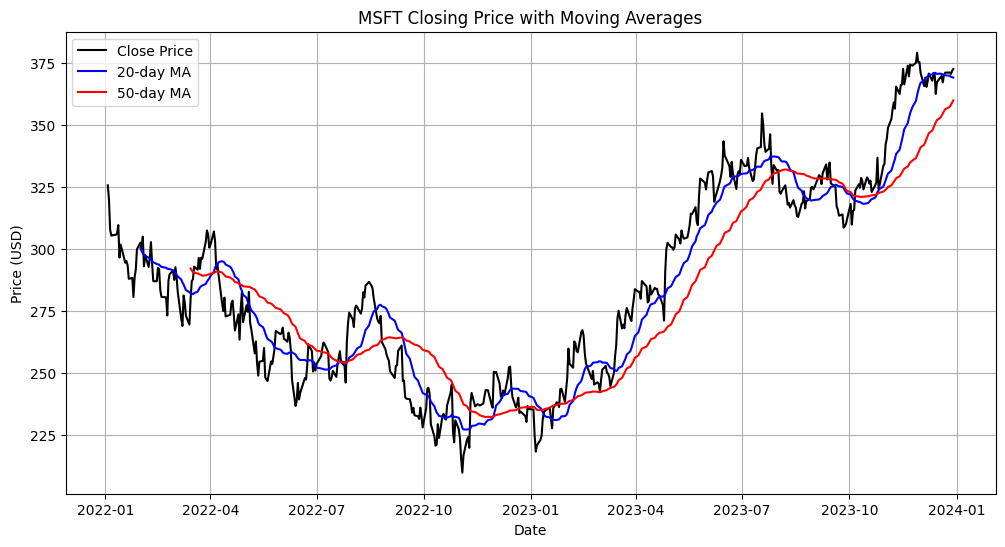

In [16]:
# Add moving averages
if not stock_data.empty and 'Close' in stock_data.columns:
    stock_data['MA20'] = stock_data['Close'].rolling(window=20).mean()
    stock_data['MA50'] = stock_data['Close'].rolling(window=50).mean()

    plt.figure(figsize=(12,6))
    plt.plot(stock_data['Close'], label='Close Price', color='black')
    plt.plot(stock_data['MA20'], label='20-day MA', color='blue')
    plt.plot(stock_data['MA50'], label='50-day MA', color='red')
    plt.title(f'{ticker} Closing Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("❌ Not enough data to plot moving averages.")

In [17]:
# Weekly candlestick chart with resampling
required_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
if not stock_data.empty and all(col in stock_data.columns for col in required_cols):
    stock_data = stock_data.dropna(subset=required_cols)
    stock_data.index = pd.to_datetime(stock_data.index)

    weekly_data = stock_data.resample('W').agg({
        'Open': 'first',
        'High': 'max',
        'Low': 'min',
        'Close': 'last',
        'Volume': 'sum'
    })

    fig = go.Figure(data=[go.Candlestick(
        x=weekly_data.index,
        open=weekly_data['Open'],
        high=weekly_data['High'],
        low=weekly_data['Low'],
        close=weekly_data['Close']
    )])

    fig.update_layout(
        title=f'{ticker} Weekly Candlestick Chart',
        xaxis_title='Week',
        yaxis_title='Price (USD)',
        xaxis_rangeslider_visible=False
    )
    fig.show()
else:
    print("❌ Skipping weekly candlestick chart — required data columns missing.")

In [18]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# List of tickers you want to compare
tickers = ['MSFT', 'AAPL', 'GOOG', 'RELIANCE.NS']  # Add or replace tickers as needed
start_date = '2022-01-01'
end_date = '2024-01-01'

# Set up subplot grid
rows = len(tickers)
fig = make_subplots(rows=rows, cols=1, shared_xaxes=True,
                    vertical_spacing=0.03,
                    subplot_titles=tickers,
                    row_heights=[1]*rows)

# Download and plot each stock
for i, ticker in enumerate(tickers, start=1):
    stock_data = yf.download(ticker, start=start_date, end=end_date)

    # Handle multi-index if it appears
    if isinstance(stock_data.columns, pd.MultiIndex):
        stock_data.columns = stock_data.columns.get_level_values(0)

    # Resample to weekly OHLC and drop NaNs
    weekly_data = stock_data.resample('W').agg({
        'Open': 'first',
        'High': 'max',
        'Low': 'min',
        'Close': 'last'
    }).dropna()

    # Add candlestick trace to subplot
    fig.add_trace(go.Candlestick(
        x=weekly_data.index,
        open=weekly_data['Open'],
        high=weekly_data['High'],
        low=weekly_data['Low'],
        close=weekly_data['Close'],
        name=ticker,
        increasing_line_color='green',
        decreasing_line_color='red',
        showlegend=False
    ), row=i, col=1)

# Update layout
fig.update_layout(
    height=300 * len(tickers),
    title_text='Weekly Candlestick Comparison',
    xaxis_rangeslider_visible=False
)

fig.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [19]:
stock_data.describe()


Price,Close,High,Low,Open,Volume
count,493.000000,493.000000,493.000000,493.000000,4.930000e+02
mean,1166.031783,1176.926637,1155.489565,1166.275329,1.364932e+07
std,62.320748,62.499838,61.856042,61.920489,7.225020e+06
min,1015.876526,1024.529663,1006.069641,1020.606873,3.370033e+06
25%,1117.798706,1129.000000,1110.150024,1119.598633,9.236126e+06
50%,1167.363892,1176.732300,1157.903076,1167.525391,1.223324e+07
75%,1208.691162,1217.875000,1196.669067,1207.998901,1.624937e+07
max,1311.513306,1318.112793,1293.425049,1318.112793,8.199715e+07
